In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("adult_with_headers (1).csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
df.duplicated().sum()

24

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


EDA

<Axes: >

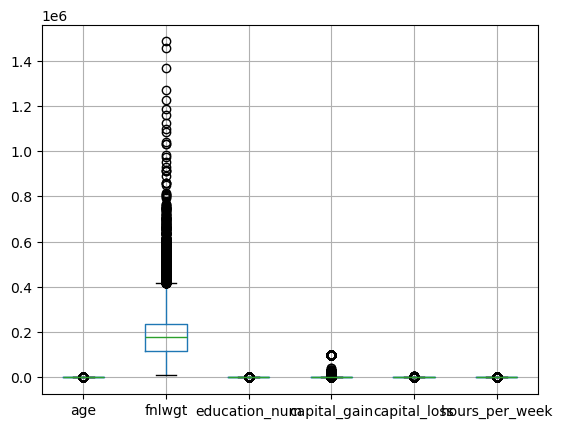

In [10]:
df.boxplot()

In [11]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes([int,float]).columns:
    outlier_capping(df,col)


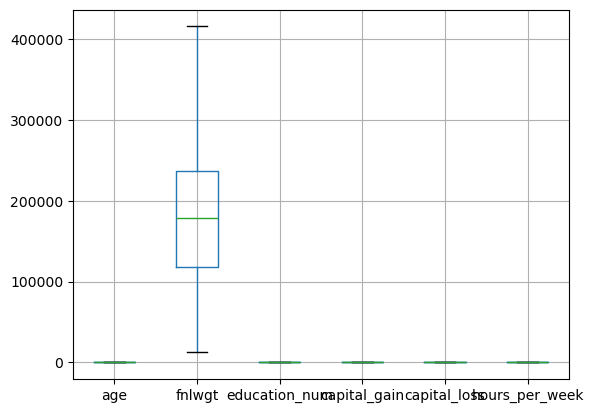

In [12]:
df.boxplot()
plt.show()

In [13]:
a=df.select_dtypes(include=[int,float])

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

MINMAX SCALER

In [16]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(a)


In [17]:
scaled_features

array([[0.36065574, 0.16168018, 0.73913043, 0.        , 0.        ,
        0.375     ],
       [0.54098361, 0.17604354, 0.73913043, 0.        , 0.        ,
        0.        ],
       [0.3442623 , 0.50404628, 0.39130435, 0.        , 0.        ,
        0.375     ],
       ...,
       [0.67213115, 0.34607158, 0.39130435, 0.        , 0.        ,
        0.375     ],
       [0.08196721, 0.46895952, 0.39130435, 0.        , 0.        ,
        0.        ],
       [0.57377049, 0.68320044, 0.39130435, 0.        , 0.        ,
        0.375     ]])

In [18]:
features_scaled=pd.DataFrame(scaled_features,columns=a.columns)

In [19]:
features_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.360656,0.161680,0.739130,0.0,0.0,0.375
1,0.540984,0.176044,0.739130,0.0,0.0,0.000
2,0.344262,0.504046,0.391304,0.0,0.0,0.375
3,0.590164,0.551325,0.217391,0.0,0.0,0.375
4,0.180328,0.808324,0.739130,0.0,0.0,0.375
...,...,...,...,...,...,...
32532,0.163934,0.607294,0.652174,0.0,0.0,0.275
32533,0.377049,0.352179,0.391304,0.0,0.0,0.375
32534,0.672131,0.346072,0.391304,0.0,0.0,0.375
32535,0.081967,0.468960,0.391304,0.0,0.0,0.000


STANDARD SCALE

In [21]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(a)

In [22]:
scaled_features

array([[ 0.03247191, -1.1492095 ,  1.1689182 ,  0.        ,  0.        ,
        -0.19447155],
       [ 0.8440022 , -1.08828431,  1.1689182 ,  0.        ,  0.        ,
        -1.4066403 ],
       [-0.04130357,  0.30300728, -0.45749623,  0.        ,  0.        ,
        -0.19447155],
       ...,
       [ 1.43420604, -0.36707517, -0.45749623,  0.        ,  0.        ,
        -0.19447155],
       [-1.22171125,  0.1541795 , -0.45749623,  0.        ,  0.        ,
        -1.4066403 ],
       [ 0.99155316,  1.06292678, -0.45749623,  0.        ,  0.        ,
        -0.19447155]])

In [23]:
featured_scaler=pd.DataFrame(scaled_features,columns=a.columns)

In [24]:
featured_scaler

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.032472,-1.149209,1.168918,0.0,0.0,-0.194472
1,0.844002,-1.088284,1.168918,0.0,0.0,-1.406640
2,-0.041304,0.303007,-0.457496,0.0,0.0,-0.194472
3,1.065329,0.503550,-1.270703,0.0,0.0,-0.194472
4,-0.779058,1.593665,1.168918,0.0,0.0,-0.194472
...,...,...,...,...,...,...
32532,-0.852834,0.740954,0.762315,0.0,0.0,-0.517717
32533,0.106247,-0.341170,-0.457496,0.0,0.0,-0.194472
32534,1.434206,-0.367075,-0.457496,0.0,0.0,-0.194472
32535,-1.221711,0.154180,-0.457496,0.0,0.0,-1.406640


In [25]:
#### compare with outliers,in this dataset which consist of a strong outliers.so i recommended Standard Scaler because in mimmax it is very sensitive outliers

One-hot encoding

In [27]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [28]:
df.nunique()

age                  62
workclass             9
fnlwgt            20811
education            16
education_num        13
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain          1
capital_loss          1
hours_per_week       22
native_country       42
income                2
dtype: int64

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
df = pd.get_dummies(df, columns=['sex', 'income'], drop_first=True,dtype=int)


In [31]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,40.0,United-States,1,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,32.5,United-States,1,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,40.0,United-States,1,0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,40.0,United-States,1,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,40.0,Cuba,0,0


In [32]:
e=df[["sex_ Male"]]
f=df[["income_ >50K"]]

In [33]:
f

,income_ >50K
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
df1=df.drop(columns=["sex_ Male","income_ >50K"])

In [37]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,32.5,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,40.0,Cuba


In [38]:
b=df.select_dtypes(include=[object])

In [39]:
b

,workclass,education,marital_status,occupation,relationship,race,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba
...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States


In [40]:
label_e=LabelEncoder()
b["workclass"]=label_e.fit_transform(b["workclass"])
print(df[["workclass"]].head())
b["education"]=label_e.fit_transform(b["education"])
print(df[["education"]].head())
b["marital_status"]=label_e.fit_transform(b["marital_status"])
print(df[["marital_status"]].head())
b["occupation"]=label_e.fit_transform(b["marital_status"])
print(df[["marital_status"]].head())
b["occupation"]=label_e.fit_transform(b["occupation"])
print(df[["occupation"]].head())
b["relationship"]=label_e.fit_transform(b["relationship"])
print(df[["relationship"]].head())
b["race"]=label_e.fit_transform(b["race"])
print(df[["race"]].head())
b["native_country"]=label_e.fit_transform(b["native_country"])
print(df[["native_country"]].head())


           workclass
0          State-gov
1   Self-emp-not-inc
2            Private
3            Private
4            Private
    education
0   Bachelors
1   Bachelors
2     HS-grad
3        11th
4   Bachelors
        marital_status
0        Never-married
1   Married-civ-spouse
2             Divorced
3   Married-civ-spouse
4   Married-civ-spouse
        marital_status
0        Never-married
1   Married-civ-spouse
2             Divorced
3   Married-civ-spouse
4   Married-civ-spouse
           occupation
0        Adm-clerical
1     Exec-managerial
2   Handlers-cleaners
3   Handlers-cleaners
4      Prof-specialty
     relationship
0   Not-in-family
1         Husband
2   Not-in-family
3         Husband
4            Wife
     race
0   White
1   White
2   White
3   Black
4   Black
   native_country
0   United-States
1   United-States
2   United-States
3   United-States
4            Cuba


In [41]:
b.head()

,workclass,education,marital_status,occupation,relationship,race,native_country
0,7,9,4,4,1,4,39
1,6,9,2,2,0,4,39
2,4,11,0,0,1,4,39
3,4,1,2,2,0,2,39
4,4,9,2,2,5,2,5


In [61]:
#### Label encoding:Label Encoding converts categorical values into numeric labels
## pros:Produces a single column per feature
## cons:Can lead to incorrect model assumptions

#### Onehot encoder:One-Hot Encoding converts each category into a separate binary column
### pros:Removes any ordinal relationship assumption
## cons:Increases dimensionality

In [63]:
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,40.0,United-States,1,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,32.5,United-States,1,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,40.0,United-States,1,0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,40.0,United-States,1,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,40.0,Cuba,0,0


In [65]:
s=df.drop(columns=["workclass","education","marital_status","occupation","race","native_country","sex_ Male","income_ >50K"])

In [67]:
s

,age,fnlwgt,education_num,relationship,capital_gain,capital_loss,hours_per_week
0,39.0,77516.0,13.0,Not-in-family,0.0,0.0,40.0
1,50.0,83311.0,13.0,Husband,0.0,0.0,32.5
2,38.0,215646.0,9.0,Not-in-family,0.0,0.0,40.0
3,53.0,234721.0,7.0,Husband,0.0,0.0,40.0
4,28.0,338409.0,13.0,Wife,0.0,0.0,40.0
...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,Wife,0.0,0.0,38.0
32557,40.0,154374.0,9.0,Husband,0.0,0.0,40.0
32558,58.0,151910.0,9.0,Unmarried,0.0,0.0,40.0
32559,22.0,201490.0,9.0,Own-child,0.0,0.0,32.5


In [69]:
df3=pd.concat([s,b,e,f],axis=1)

In [71]:
df3

,age,fnlwgt,education_num,relationship,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Male,income_ >50K
0,39.0,77516.0,13.0,Not-in-family,0.0,0.0,40.0,7,9,4,4,1,4,39,1,0
1,50.0,83311.0,13.0,Husband,0.0,0.0,32.5,6,9,2,2,0,4,39,1,0
2,38.0,215646.0,9.0,Not-in-family,0.0,0.0,40.0,4,11,0,0,1,4,39,1,0
3,53.0,234721.0,7.0,Husband,0.0,0.0,40.0,4,1,2,2,0,2,39,1,0
4,28.0,338409.0,13.0,Wife,0.0,0.0,40.0,4,9,2,2,5,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,Wife,0.0,0.0,38.0,4,7,2,2,5,4,39,0,0
32557,40.0,154374.0,9.0,Husband,0.0,0.0,40.0,4,11,2,2,0,4,39,1,1
32558,58.0,151910.0,9.0,Unmarried,0.0,0.0,40.0,4,11,6,6,4,4,39,0,0
32559,22.0,201490.0,9.0,Own-child,0.0,0.0,32.5,4,11,4,4,3,4,39,1,0


In [73]:
### adding two new feature (first column) 

In [115]:
age_income_ratio = df3['age'] / (df3['income_ >50K'] + 1) 


In [117]:
age_income_ratio

0        39.0
1        50.0
2        38.0
3        53.0
4        28.0
         ... 
32556    27.0
32557    20.0
32558    58.0
32559    22.0
32560    26.0
Length: 32537, dtype: float64

In [79]:
df3['age_income_ratio']=age_income_ratio
df3

,age,fnlwgt,education_num,relationship,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Male,income_ >50K,age_income_ratio
0,39.0,77516.0,13.0,Not-in-family,0.0,0.0,40.0,7,9,4,4,1,4,39,1,0,39.0
1,50.0,83311.0,13.0,Husband,0.0,0.0,32.5,6,9,2,2,0,4,39,1,0,50.0
2,38.0,215646.0,9.0,Not-in-family,0.0,0.0,40.0,4,11,0,0,1,4,39,1,0,38.0
3,53.0,234721.0,7.0,Husband,0.0,0.0,40.0,4,1,2,2,0,2,39,1,0,53.0
4,28.0,338409.0,13.0,Wife,0.0,0.0,40.0,4,9,2,2,5,2,5,0,0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,Wife,0.0,0.0,38.0,4,7,2,2,5,4,39,0,0,27.0
32557,40.0,154374.0,9.0,Husband,0.0,0.0,40.0,4,11,2,2,0,4,39,1,1,20.0
32558,58.0,151910.0,9.0,Unmarried,0.0,0.0,40.0,4,11,6,6,4,4,39,0,0,58.0
32559,22.0,201490.0,9.0,Own-child,0.0,0.0,32.5,4,11,4,4,3,4,39,1,0,22.0


In [109]:
## second column

In [101]:
work_efficiency = df3['capital_gain'] / (df3['hours_per_week'] + 1)



In [103]:
work_efficiency

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    0.0
32558    0.0
32559    0.0
32560    0.0
Length: 32537, dtype: float64

In [105]:
df3["work_efficiency"]=work_efficiency

In [107]:
df3

,age,fnlwgt,education_num,relationship,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Male,income_ >50K,age_income_ratio,work_efficiency
0,39.0,77516.0,13.0,Not-in-family,0.0,0.0,40.0,7,9,4,4,1,4,39,1,0,39.0,0.0
1,50.0,83311.0,13.0,Husband,0.0,0.0,32.5,6,9,2,2,0,4,39,1,0,50.0,0.0
2,38.0,215646.0,9.0,Not-in-family,0.0,0.0,40.0,4,11,0,0,1,4,39,1,0,38.0,0.0
3,53.0,234721.0,7.0,Husband,0.0,0.0,40.0,4,1,2,2,0,2,39,1,0,53.0,0.0
4,28.0,338409.0,13.0,Wife,0.0,0.0,40.0,4,9,2,2,5,2,5,0,0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,Wife,0.0,0.0,38.0,4,7,2,2,5,4,39,0,0,27.0,0.0
32557,40.0,154374.0,9.0,Husband,0.0,0.0,40.0,4,11,2,2,0,4,39,1,1,20.0,0.0
32558,58.0,151910.0,9.0,Unmarried,0.0,0.0,40.0,4,11,6,6,4,4,39,0,0,58.0,0.0
32559,22.0,201490.0,9.0,Own-child,0.0,0.0,32.5,4,11,4,4,3,4,39,1,0,22.0,0.0


In [119]:
### log transformation

In [125]:
df3['log_hours_per_week']=np.log1p(df3["hours_per_week"])

In [127]:
df3

,age,fnlwgt,education_num,relationship,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Male,income_ >50K,age_income_ratio,work_efficiency,log_capital_gain,log_hours_per_week
0,39.0,77516.0,13.0,Not-in-family,0.0,0.0,40.0,7,9,4,4,1,4,39,1,0,39.0,0.0,0.0,3.713572
1,50.0,83311.0,13.0,Husband,0.0,0.0,32.5,6,9,2,2,0,4,39,1,0,50.0,0.0,0.0,3.511545
2,38.0,215646.0,9.0,Not-in-family,0.0,0.0,40.0,4,11,0,0,1,4,39,1,0,38.0,0.0,0.0,3.713572
3,53.0,234721.0,7.0,Husband,0.0,0.0,40.0,4,1,2,2,0,2,39,1,0,53.0,0.0,0.0,3.713572
4,28.0,338409.0,13.0,Wife,0.0,0.0,40.0,4,9,2,2,5,2,5,0,0,28.0,0.0,0.0,3.713572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,Wife,0.0,0.0,38.0,4,7,2,2,5,4,39,0,0,27.0,0.0,0.0,3.663562
32557,40.0,154374.0,9.0,Husband,0.0,0.0,40.0,4,11,2,2,0,4,39,1,1,20.0,0.0,0.0,3.713572
32558,58.0,151910.0,9.0,Unmarried,0.0,0.0,40.0,4,11,6,6,4,4,39,0,0,58.0,0.0,0.0,3.713572
32559,22.0,201490.0,9.0,Own-child,0.0,0.0,32.5,4,11,4,4,3,4,39,1,0,22.0,0.0,0.0,3.511545


In [129]:
### we use the log transformation for reducing the transformation